<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_2_INAM/blob/main/Copia_de_Students_INAM_02_classification_part_two_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ambient intelligence

In this lab session we are going to learn about:

1. Linear models for classification: Least squares and Fisher Discriminant.
2. The perceptron.
3. Multilayer perceptron and the Backpropagation algorithm.

If interested on the subject, a good summary for classification methods can be found [here](https://www.microsoft.com/en-us/research/wp-content/uploads/1996/01/neural_networks_pattern_recognition.pdf)

## Multilayer perceptron and the Backpropagation algorithm
![Linear](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)



## Neural Networks and the backpropagation algorithm
![Neural network of two inputs and two outputs with two neurons in the hidden layer](https://drive.google.com/uc?id=1I9_2sblgfzQVXVUS5h7JQCdEYJiQZ3ij)

We can go a step further and instead of having a single perceptron, imagine that we have infinite of them, each one initializated with random weights. As explained, each one will converge towards a different decision boundary that will divide the input space. This creates the concept of a layer of perceptron in which each one receives all inputs and outputs a single output.
Moreover, in order to overcome the fact that perceptrons can only converge when the input space is linearly separable, we can organize our layers in a cascade manner: the output of a neuron acts as one of the inputs of another neuron. In other words: layer outputs are the inputs for the neurons in the next layer. Lastly, we can use non-linear step functions that will provide the model the capability to learn non-linear decision boundaries (*hint: the sigmoid function **was** the common one*). These non-linear function will convert the input space to a feature space that, with some luck, the features will become linearly separable. 

Classic Neural Networks are made of 3 layers: input, hidden and output: 
*   The input layer is our dataset, in which each observation (vector) is considered a neuron of the input layer. 
*   The hidden layer is composed by $h$ neurons, where $h$ is not known and can only be guessed by trial and error, the goal of this layer is to find projections of the input data in order to make it linearly separable. All input vectors goes to each of the neurons in the hidden layer. For example, if our dataset consists in 10 vectors and we have 5 neurons in the hidden layer, the model will reduce the input space from dimension from ten dimensions to a feature space of five dimensions (the outputs of the hidden layer).
*   Lastly, the output layer has as many neurons as dimensions we have in the response variable of the dataset. For regression and two class classification problems, the number of neurons in the output layer is one. When dealing with $K$-classes classification problems, the output layer has $K$ neurons.

The learning algorithm keeps being SGD, but with a higher degree of complexity as now it is needed to update the value of the weights of every neuron of all the model at the same time, so it is necessary a method capable of impute how each weight affects the error at the output. The algorithm that permits to accomplish this is the **backpropagation algorithm**.

### Backpropagation algorithm
Imagine that we present an observation to our Neural Network model and we compare its output with the ground truth or expected output. In the case that our model classifies correctly, it is not needed to update the weights of the model, but if it misclassifies the observation, it is needed to correct the values of the weights. In order to accomplish this, we cannot keep using a threshold function as was happening in the output of the perceptron as this function does not gives a quantity about how much our prediction is incorrectly. It is needed to use a smooth and continuous function named the loss function (in fact *loss* is the general term for a family of functions).

The objective of the train of a Neural Network model (the fit) is to reduce (minimize) as much as possible the value of the loss function. So, the function outputs a loss (quantity of discrepancy between expected output and model output) that is propagated from the output of the model to the inputs, in order to quantify the responsability (contribution to the loss) of each neuron with the output. Because we go from output to input, the algorithm is known as **backpropagation**.

In fact, the only part that the model can modify in order to reduce the loss are its parameters, and in order to known how much we need to change the weights in order to minimize the loss, is through the use of derivatives. In summary, the backpropagation algorithm is just the chain rule of derivatives.

In modern Neural Network frameworks, what is done is to generate the computational graph of the model. The computational graph is an structure that represents all the operations made in the model and their dependencies.
 ![Computational graph](https://drive.google.com/uc?id=1hmhU8pmdZ7V0nJZ6jCZRjh9kGBfi8eFr)

Following the computational graph of a single unit of a neural network (a perceptron) it is easy to understand how the mechanism works. First, it is needed to compute the forward pass, that is, the normal operations made on our model in order to give an output. If we have a two dimensional vector as input with values $x=[1, 3]$ and weights initialized random with values $w=[2,2]$ and $b=[-1.5]$ and using the activation function sigmoid $\sigma(x)=\frac{1}{1+e^{-x}}$, we get the output 1. 
![Computation graph example](https://drive.google.com/uc?id=1XOI7Bbivox2N22M5qoyvoFpBMrTpa1wn)
Imagine that the output of the model is not the correct one and that the derivative of our loss function ($\frac{\partial y}{\partial y}$) is 1.
Now, it is needed to backpropagate the error. The first thing to do is to compute the derivative of the activation function with respect to its input that was 6.5. The derivative of the sigmoid function is $\frac{\partial \sigma}{\partial x}=(1-\sigma(x))\sigma(x))$, resulting a value of 0.0015, by the chain rule we multiply it by the derivative of the loss function, 1, obtaining 0.0015. Now, this value needs to be propagate through the sum operation, the derivative of a sum is 1 independently of the input for it is derived (remember $\frac{\partial (a+b)}{\partial a}=1$ and $\frac{\partial (a+b)}{\partial b}=1$), so we multiply our error by 1, maintaining an error of 0.0015 and imputing it to the parameter $b$. Next we have another sum operation, so the same rule applies, and propagating back an error value of 0.0015. Now we need to compute the error with respect the inputs and weights, the derivative for the multiplication is $\frac{\partial (a*b)}{\partial a}=b$ and $\frac{\partial (a*b)}{\partial b}=a$. So we multiply for obtaining the error of $w_1$ 0.0015 by 1, for $x_1$ is 0.0015\*2, for $w_2$ is 0.0015\*3 and for $x_2$ is 0.0015*2. Giving us that $w_1$ has an error of 0.0015 and $w_2$ an error of 0.0045.

![Computation graph example 2](https://drive.google.com/uc?id=1IFL-TJMCq2Pza6vvO7vvvwdWBrYGssJ8)
Now we can use the SGD algorithm, this time with a learning rate $\alpha$ of (commonly) 0.001 and update the value of the parameters of the model.

This procedure is made until convergence or until $n$ steps.

In modern Neural Network frameworks where a lot of data is involved, data is divided in batches, that are subsets of the whole dataset, after every batch the parameters are updated, this technique is known as **minibatch gradient descent**. When all the data has been used, it is considered an **epoch**. The algorithm is then repeated for a number of $n$ epochs defined by the user or when convergence is accomplished.

#### Some notes
The k-classification problem in perceptrons is solved by using an activation function called [softmax](https://en.wikipedia.org/wiki/Softmax_function). It is needed to have as many neurons as classes and the model will learn to map the neurons outputs of our last layer to each of the classes.

The most common algorithm used for optimizing the model is the [stochastic gradient descent ](https://scikit-learn.org/stable/modules/sgd.html) but there are others, for example the sklearn library permits to use the [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) optimization algorithm. Note: Modern Deep Learning models use SGD or [ADAM](https://arxiv.org/abs/1412.6980).

Because the random initialization of the weights, expect different values of the outputs and weights when training the model with the same input. A commonly practice is to set a seed in order to be able to reproduce the experiments. In the library sklearn the seed is defined by the parameter random_state of the different functions of the library.

In classification, it is no longer necesary to convert the target to be -1 or +1, as 0 and 1 can be used and is the common practice in the other Machine Learning methods. So the outputs of a Neural Network can be considered as probabilities (sum up to 1).

$\lambda$ is an hyperparameter of the neural network that shrinks the value of the weights towards 0, this is made in order to fight overfitting of the model to train data and to be able to generalize and give good predictions with data not seen during training. Usually, the [regularization ](https://en.wikipedia.org/wiki/Regularization_(mathematics) is a term that is added to the loss function in which the norm of the weight vector is divided by the $\lambda$ parameter, if $lambda$=0 no regularization is made on the model and with  large values of $lambda$ lower will be the values of the weights. In sklearn, $\lambda$ is the alpha parameter of the function.

**Train vs test set: The overfit dilema**

[Overfitting ](https://en.wikipedia.org/wiki/Overfitting)
What is desired in any Machine Learning, statistics or Deep Learning models is the fact the model learns the underlying process that generates the data and so, be able to give good predictions to data not used during the train of the model. Models with a large number of parameters (complexity) like Neural Networks can learn to copy the data used to train them, giving very bad predictions on data from the same process that has not been used during train as the model has learned also the inherent and irreducible noise that the data has. A model which is unable to give good predictions outside the train dataset it is said to be *overfitted* to train data. There exists different theoretical justifications and methodologies in order to overcome this problem, one of the most usual techniques is the use of regularization (explained above) but some models have specific techniques to fight the overfitting issue. The most common practice in order to evaluate the model to unseen data is by dividing the set of data of our problem into a train set and a test set, usually 80% of the data for train and the rest for test (in Deep Learning when using millions of observations also there's a validation set).
Personally I recommend the following videos [video](https://www.youtube.com/watch?v=7-6X3DTt3R8) and [video II](https://www.youtube.com/watch?v=ZmLKqZYlYUI&t=649s), it will clarify any doubt.

**Cross validation**

[Cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) is a technique used in order to evaluate the model with different sets of data and also to evaluate different values of the hyperparameters of the model. The most common technique is the *K-fold crossvalidation*, it consists in divide the dataset in K parts (usually K = 10), and then train the model with the data of K-1 parts (folds) and evaluate it with the fold not used for train. Then repeat this changing the fold used for test by one used for train until all folds have been used for test. In each change of test a new model is fit and evaluated. The mean accuracy of the K models is the accuracy of the choosed learning algorithm under the choosen configuration (hyperparameters of the model).
![k-fold X-validation ](https://drive.google.com/uc?id=1x7FOkZ-71_H2pgPfkrB936n5iJtS9hhd)

[Source of the image](https://www.researchgate.net/figure/Diagram-of-k-fold-cross-validation-with-k-10-Image-from-Karl-Rosaen-Log_fig1_332370436)

For deciding the value of the models hyperparameters, the common practice is to usea a grid search methodology. It consists in create a list of values to try and create and compare models with the different values. This will give a sense of which value is better for the model. This is done this way because hyperparameters of the model depends of the dataset at hand. 

When the data available is scarce, a good method to use is the Leave One out cross validation (LOOCV) where the model is trained in all the observations with the exception of one, that is used for test. This is done until all observations have been used as the only observation to test the model.

The sklearn library provides tools to evaluate and find the models hyperparameters.

**Normalization of the data**

Always normalize the data as methods will work better under normalized inputs. The commonly standardization technique is to use z-scores (substract the mean and divide by the standard deviation every column of the dataset).
Some learning algorithms are not capable of work if the data is not normalized.
[Sklearn preprocess](https://scikit-learn.org/stable/modules/preprocessing.html) provides different methods to normalize the data, where the most common one is the StandardScaler method.

### Neural Network example
Because the computational complexity of the model has grown a lot when compared to our other examples, we will use the library SKLEARN in order to create the [neural network model](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).



In [ ]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model, datasets
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Auxiliary functions

def accuracy(predicted, y):
  return np.sum(predicted==y) /len(y)

from matplotlib.colors import ListedColormap

"""
The following function plots the decision boundaries for perceptrons and neural
networks models when the data has 2 features plus a bias.
"""
def plot_decision_boundary(mlp_data, model):
  h = .02
  x_min, x_max = mlp_data[:, 0].min() - .5, mlp_data[:, 0].max() + .5
  y_min, y_max = mlp_data[:, 1].min() - .5, mlp_data[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  fig, ax = plt.subplots(1,1)
  if hasattr(model, "decision_function"):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='black', s=25)
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    alpha=0.6, edgecolors='black', s=25)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title("Neural network Decision Boundary")
  plt.show()

In [ ]:
# Creating the dataset
n = 1000
cov_matrix = np.array([[1, 0.3], [0.3, 1]])
class_red_means = np.array([2,0])
class_green_means = -class_red_means
x_red = np.random.multivariate_normal(class_red_means, cov_matrix, n)
x_green = np.random.multivariate_normal(class_green_means, cov_matrix, n)
red = np.hstack((x_red, np.ones((n,1))))
green = np.hstack((x_green, np.zeros((n,1))))
x = np.vstack((red,green))
data = pd.DataFrame(x,columns=["x1", "x2", "target"])
data["intercept"] = 1
x = data[["x1", "x2", "intercept"]].values
targets = data["target"].values

In [ ]:
# Train the model

seed = 17 # Important for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, targets, test_size=0.2,
                                                    random_state=seed)
scaler_model_train = StandardScaler().fit(X_train[:,:2])
mlp_train_data = scaler_model_train.transform(X_train[:,:2])
mlp_test_data = scaler_model_train.transform(X_test[:,:2])

# creating an object of class MLP with SGD as learning algorithm, 
# 15 neurons in the hidden layer and a regularization of 0.001.
model = MLPClassifier(activation="logistic",solver="sgd", alpha=0.001, 
                      hidden_layer_sizes=(15,), random_state=seed, max_iter=1500) 
model.fit(mlp_train_data, y_train)


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(15,),
              max_iter=1500, random_state=17, solver='sgd')

Once a Neural Network is trained, we get the following information:
> MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=17, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

This is a summary of the characteristics of our model. 
*   activation is the activation function used. Logistic = sigmoid. The most common activation function in Deep Learning models is the rectified linear unit (ReLU).
*   batch_size is the size of the batchs of data.
*   hidden_layer_sizes is the number of neurons in the hidden layers
*   Alpha is the regularization term.
*   early stopping its a technique that consists in stopping the fitting of the model if the model overfits on the train set while doing poorly on the validation set, so it is not needed to wait until the max number of iterations.
*   n_iter_no_change is to stop if no improvement during n iterations.
*   shuffle: A common tactic that is used in order that the model don't learn the order of the training data. A good explanation of this fact is given in the overfitting explanation of the notes.
*   validation_fraction is a set of data extracted from our train set in order to evaluate the model internally during training (used for example in early _stop).
*   momentum and nesterov momentum are modifications of the SGD algorithm that improves its convergence.



In [ ]:
y_predicted = model.predict(mlp_test_data) 
print(f"Neural network accuracy in unseen data: {accuracy(y_predicted, y_test)}")
# same as model.score(X_test, y_test)

Neural network accuracy in unseen data: 0.975


Visualization of the model decision boundary

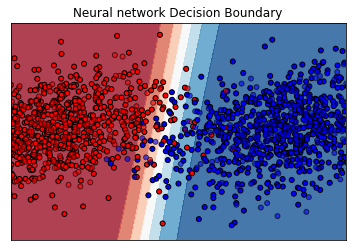

In [ ]:
plot_decision_boundary(mlp_train_data, model) # normalized data

**Question 1: What happens if the input variables are not standardized / scaled? Explain it with an example where we have two input variables one in the unit scale of milions (i.e. in the range [1\*10⁶, 5\*10⁶] and the other in the unit scale (i.e. range [0,10])**

Gracias a la estandarización del conjunto de datos, conseguimos que su distribución se aprecie como una gaussiana ( media cero y varianza unitaria).
Como muchos elementos del algoritmo de aprendizaje tienen en cuenta que los datos tienen una distribución gausiana, cuando una característica tiene una varianza con un orden de magnitud superior, domina la función objetivo y provoca que el modelo no aprenda correctamente de las otras características.

**Question 2: Why in Deep Learning it is usual to split the data into train, validation and test sets? Answer explaining the use of each of the subsets.**

El aprendizaje de una red neuronal consiste en ajustar todos los pesos de su configuración interna de modo que se obtenga la salida deseada a un determinado vector de entrada. Para ello se sigue la siguiente metodologia:
- Se separa el conjunto de datos en 3: train, validation y test
- El conjunto de train (aprox 70%) se utiliza para alimentar a la red neuronal con la entrada y la respuesta ideal. Mediante Bckup es capaz de encontrar que configuración de pesos le lleva a obtener dicha respuesta.
- El conjunto de validación (aprox 20%) se utiliza para comprovar el estado de aprendizaje del modelo en cada epoca.
- Una vez el modelo esta entrenado, se utiliza el conjunto de test(aprox 10%) formado por datos nunca analizados por la red y se determinan características del modelo como la precisión o la matriz de confusión.

**Question 3: Do you think it is a good practice to shuffle the data?**

Cómo el machine learning es una rama del deep learning, estos modelos son capaces de profundizar en el conjunto de datos y encontrar patrones y tendencias ocultas en el conjunto. Pues tener los datos ordenados puede hacer entender al modelo que dicho orden es un patrón o característica del conjunto, lo que conlleva a que base su aprendizaje en ese orden. 
Al mezclar los datos de manera aleatoria conseguimos eliminar la posiblidad de que el modelo aprenda patrones innecesarios.

**Question 4: Enumerate three different hyperparameters of a MLP model. How would you find correct values for those hyperparameters?**
- Learning rate
- Número de capas
- Número de neuronas por capa

Para encontrar los valores adecuados de los hiperparámetros hay que tener en cuenta qué problema se esta solucionando (clasificación de imagen, de audio, regresión, etc.) y qué modelo o red neuronal se va a utilizar. En la información que ofrecen los creadores de los modelos se especifican que rangos toman los hiperparámetros del modelo.

**Question 5: What do you think is the effect of having less neurons in the hidden layer than features are in the input data and the output layer with the same number of neurons than in the input layer? What kind of applications could benefit from this approach?**
![image.png](https://drive.google.com/uc?export=view&id=18pp1cYB6pNR6uBZ5GDFeTCe0QIAQf2kb)